# Assignment: 01

#### Load the Iris dataset into a pandas DataFrame


In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
df.head(2)
df.shape

(150, 5)

#### 1. Calculate the 75th percentile of the 'petal_width' column for each species in the Iris dataset.


In [2]:
df['petal_width'].quantile(0.75)

1.8

#### 2. Create a new column in the Iris DataFrame called 'sepal_area', which is the product of 'sepal_length' and 'sepal_width'.


In [3]:
df['sepal_area'] = df['sepal_length']*df['sepal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70


#### 3. Remove all rows in the Iris DataFrame where 'petal_length' is greater than twice the standard deviation of 'petal_length' for that species.


In [4]:
petal_length_std = df['petal_length'].std()
petal_length_std

1.7652982332594662

In [5]:
df = df.drop(df[df['petal_length'] > 2*petal_length_std].index)

#### 4. Normalize all numerical columns in the Iris DataFrame (except the 'species' column) using Min-Max scaling.


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_area'],
      dtype='object')

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = scaler.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','sepal_area']])
scaled_data = model.transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area']])

In [9]:
model.get_feature_names_out()

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_area'], dtype=object)

In [11]:
Scaled_df = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())
Scaled_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.478788,0.554545,0.252364,0.216364,0.450591
std,0.232747,0.199967,0.226650,0.246279,0.212070
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.458333,0.160000,0.100000,0.316313
50%,0.466667,0.583333,0.200000,0.100000,0.452918
75%,0.600000,0.666667,0.240000,0.250000,0.571286
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,5.018182,3.330909,1.630909,0.316364,16.794909
std,0.349121,0.479920,0.566625,0.246279,3.198022
min,4.300000,2.000000,1.000000,0.100000,10.000000
25%,4.800000,3.100000,1.400000,0.200000,14.770000
50%,5.000000,3.400000,1.500000,0.200000,16.830000
75%,5.200000,3.600000,1.600000,0.350000,18.615000
max,5.800000,4.400000,3.500000,1.100000,25.080000


### 3. Find the three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length' in the Iris dataset.

In [14]:
# Creating sub dataset
subset_df = Scaled_df[['sepal_length', 'sepal_width', 'petal_length']]

# Group by and count the occurrences
subset_df.value_counts().reset_index(name='count').head(3)

,sepal_length,sepal_width,petal_length,count
0,0.533333,0.625000,0.16,2
1,0.400000,0.458333,0.20,2
2,0.333333,0.416667,0.16,2


In [19]:
Scaled_df[['sepal_length','sepal_width']].value_counts().reset_index(name='count')

,sepal_length,sepal_width,count
0,0.533333,0.750000,3
1,0.466667,0.583333,2
2,0.266667,0.500000,2
3,0.533333,0.625000,2
4,0.400000,0.458333,2
5,0.733333,0.583333,2
6,0.333333,0.416667,2
7,0.333333,0.583333,2
8,0.733333,0.791667,2
9,0.466667,0.625000,2


### 6.  Group the Iris DataFrame by 'species' and find the row with the highest 'sepal_width' for each group.


In [23]:
df.groupby(['species'], as_index=False)['sepal_width'].max()

,species,sepal_width
0,setosa,4.4
1,versicolor,2.6


In [22]:
df['species'].value_counts()

setosa        50
versicolor     5
Name: species, dtype: int64

### 7.  Replace all negative values in the 'petal_width' column of the Iris DataFrame with the mean of the non-negative values in that column.


In [32]:
df[['petal_width']][df['petal_width']>0]

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2
5,0.4
6,0.3
7,0.2
8,0.2
9,0.1


In [26]:
non_negative_mean_petal_width = df['petal_width'][df['petal_width']>0].mean()

df['petal_width'][df['petal_width']<0] = non_negative_mean_petal_width

0.31636363636363635

### 8. Calculate the correlation matrix for the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns in the Iris dataset and find the feature with the highest absolute correlation with 'petal_width'.


In [34]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# Assignment: 02

### Load the Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = sns.load_dataset('titanic')
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
446,1,2,female,13.0,0,1,19.50,S,Second,child,False,NaN,Southampton,yes,False
461,0,3,male,34.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
842,1,1,female,30.0,0,0,31.00,C,First,woman,False,NaN,Cherbourg,yes,True


In [66]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group'],
      dtype='object')

### 1. Find the average age of passengers for each class (1st, 2nd, and 3rd).


In [4]:
df.groupby(['class'], as_index=False)['age'].mean()

,class,age
0,First,38.233441
1,Second,29.877630
2,Third,25.140620


### 2. Create a new DataFrame that contains the count of male and female passengers in each age group (e.g., 0-10, 11-20, etc.).


In [8]:
# new_df = 
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [23]:
df['age_group'] = pd.cut(df['age'], 8)

In [42]:
df[['age','age_group']].sample(3)

,age,age_group
193,3.0,"(0.34, 10.368]"
474,22.0,"(20.315, 30.263]"
126,NaN,NaN


In [65]:
df.groupby(['age_group', 'sex'],as_index=False).size()

,age_group,sex,size
0,"(0.34, 10.368]",female,31
1,"(0.34, 10.368]",male,33
2,"(10.368, 20.315]",female,46
3,"(10.368, 20.315]",male,69
4,"(20.315, 30.263]",female,81
5,"(20.315, 30.263]",male,149
6,"(30.263, 40.21]",female,55
7,"(30.263, 40.21]",male,100
8,"(40.21, 50.158]",female,31
9,"(40.21, 50.158]",male,55


### 3. Find the name and ticket number of the passenger(s) who paid the highest fare and survived the disaster.


In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
df[['Name', 'Ticket', 'Fare', 'Survived']][(df['Fare']==df['Fare'].max()) & (df['Survived']==1)]

,Name,Ticket,Fare,Survived
258,"Ward, Miss. Anna",PC 17755,512.3292,1
679,"Cardeza, Mr. Thomas Drake Martinez",PC 17755,512.3292,1
737,"Lesurer, Mr. Gustave J",PC 17755,512.3292,1


### 5. For each passenger, calculate the age difference with the oldest sibling (if any) and the age difference with the youngest sibling (if any).


In [85]:
# all the siblings will have the same last name.
# so the plan is to create a new column for the last name and groupby them 

616            Danbom, Mr. Ernst Gilbert
546    Beane, Mrs. Edward (Ethel Clarke)
339         Blackwell, Mr. Stephen Weart
Name: Name, dtype: object

In [91]:
df['last_name'] =df['Name'].str.split(',', expand=True)[0]
df[['Name', 'last_name']].sample(3)

,Name,last_name
590,"Rintamaki, Mr. Matti",Rintamaki
868,"van Melkebeke, Mr. Philemon",van Melkebeke
43,"Laroche, Miss. Simonne Marie Anne Andree",Laroche


In [101]:
lastName_GB = df.groupby(['last_name'], as_index=False)['Age'].agg(['min','max']).reset_index()
lastName_GB['sib_age_diff'] = abs(lastName_GB['min']-lastName_GB['max'])
lastName_GB

,last_name,min,max,sib_age_diff
0,Abbing,42.0,42.0,0.0
1,Abbott,16.0,35.0,19.0
2,Abelson,28.0,30.0,2.0
3,Adahl,30.0,30.0,0.0
4,Adams,26.0,26.0,0.0
...,...,...,...,...
662,de Mulder,30.0,30.0,0.0
663,de Pelsmaeker,16.0,16.0,0.0
664,del Carlo,29.0,29.0,0.0
665,van Billiard,40.5,40.5,0.0


### 6. Find the most common deck letter (A, B, C, etc.) for each passenger class.


In [102]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'last_name'],
      dtype='object')

In [ ]:
b

### 7. Replace any missing values in the 'sex' column with the most frequent value in that column.


In [105]:
sex_mode = df['Sex'].mode()
df['Sex'].fillna(sex_mode, inplace=True)

In [106]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 7. Group the Titanic DataFrame by 'Embarked' (port of embarkation) and find the percentage of passengers who survived in each group.


In [107]:
df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### 8. Calculate the correlation matrix for the 'Age', 'Fare', and 'Survived' columns in the Titanic dataset and find the feature with the highest absolute correlation with 'Survived'.


In [108]:
df[['Age', 'Fare', 'Survived']].corr()

,Age,Fare,Survived
Age,1.000000,0.096067,-0.077221
Fare,0.096067,1.000000,0.257307
Survived,-0.077221,0.257307,1.000000


### 9. Create a new DataFrame that contains the 'Pclass', 'Sex', 'Age', and 'Fare' columns from the Titanic dataset and pivot it to have 'Pclass' as the index, 'Sex' as the columns, and 'Fare' as the values, with 'Age' as the weights.


In [111]:
# wrong solution
# new_df = df[['Pclass', 'Sex', 'Age', 'Fare']]

# new_df.set_index('Pclass')

# correction
new_df = df[['Pclass', 'Sex', 'Age', 'Fare']].pivot_table(index='Pclass', columns='Sex', values='Fare', aggfunc='mean', fill_value=0, margins=True, margins_name='Total', dropna=False)
new_df.head()

Sex,female,male,Total
Pclass,,,
1,106.125798,67.226127,84.154687
2,21.970121,19.741782,20.662183
3,16.118810,12.661633,13.675550
Total,44.479818,25.523893,32.204208


# Assignment: 03

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 1. Scatter plot: Visualize the relationship between 'orbital_period' and 'mass' of the planets.


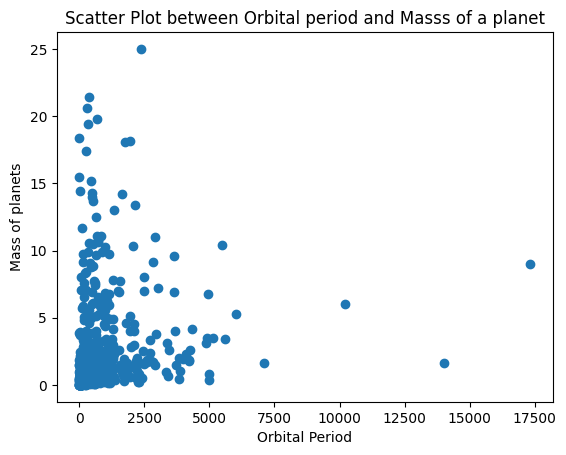

In [116]:
plt.scatter(x=df['orbital_period'], y=df['mass'])
plt.xlabel('Orbital Period')
plt.ylabel('Mass of planets')
plt.title('Scatter Plot between Orbital period and Masss of a planet')
plt.show()

### 2. Bar plot: Display the count of planets discovered by each method.


In [117]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

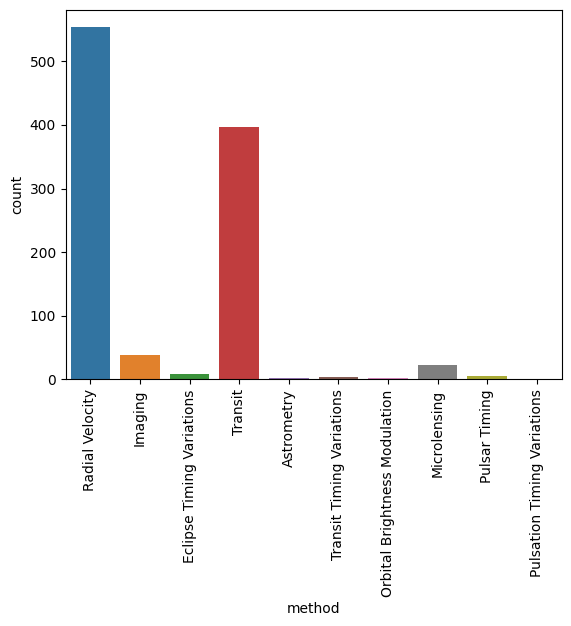

In [130]:
sns.countplot(data=df, x='method')
plt.xticks(rotation='vertical')
plt.show()

### 3. Histogram: Visualize the distribution of 'distance' of planets from their respective stars.


<AxesSubplot:xlabel='distance', ylabel='Count'>

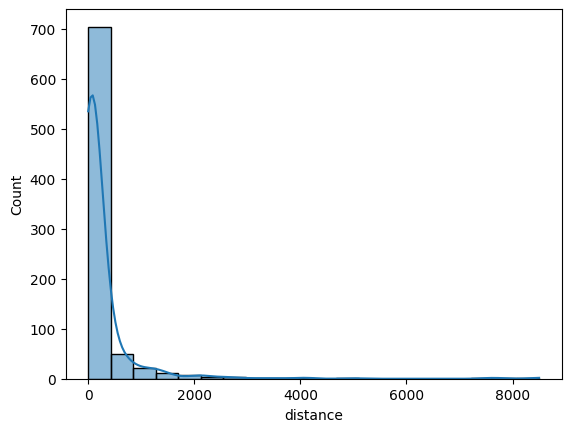

In [133]:
sns.histplot(data=df, x='distance', bins=20, kde=True)